In [2]:
import numpy as np
import pandas as pd
import multiprocessing as mp
import re

import matplotlib.pyplot as plt

import spacy

from nltk.corpus import stopwords
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
pool = mp.Pool()

Process ForkPoolWorker-4:
Process ForkPoolWorker-5:
Process ForkPoolWorker-7:
Process ForkPoolWorker-8:
Process ForkPoolWorker-1:
Process ForkPoolWorker-6:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _b

# Yelp Reviews

## EDA

In [4]:
filename = 'yelp-dataset/reviews_500000.json'

In [5]:
df = pd.read_json(filename)

In [6]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
1,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
2,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
3,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g
4,vgfcTvK81oD4r50NMjU2Ag,0,2011-02-25,0,pfavA0hr3nyqO61oupj-lA,1,This place sucks. The customer service is horr...,2,msQe1u7Z_XuqjGoqhB0J5g


In [7]:
df.user_id.value_counts().head(20)

71XStF5U0kmJw2Iym9fclQ    311
HikPdCQGk1mk5JsPjur7Nw    271
2Kgd8_CKyYMvauEA6Z0mAA    239
zT9WFNJXeQZBA-WJMsV4Zw    234
1HFkcIGKY7-e9vCsc8PX5g    227
j5xtbqfOYZbLFd2p8EGi5A    224
ELfzWgdf64VBLi5z1ECItw    214
U3Su5FLssAUKNYonpzIgRw    198
vLixm38Zd-xgAvN1LQJfKQ    197
9BuTUHt6Zlm-UCjaGD6aJQ    197
eeBt7Uo5FOXwvaLIeW3fGA    176
jEBySjq6tgL-_R3P7LHq0w    163
miYadhpWV81SXUEae3LX_A    162
460PoNGmuFFKF4cJ2XQj9A    155
on4PBkuSAUi8gqlJHSyefA    152
UmTMCfPlhA6kJLAsLycSfg    141
hXa4Y-x3bcVfNkUcuPDLEw    140
xovKY9oB8s-NjKz_I1RpHQ    137
qt1b6zXExL-uoJGRRouQYw    134
DWfos3PxcrkqAJoAZHEg3A    131
Name: user_id, dtype: int64

We'll just use the ten most prolific users' reviews here.

In [8]:
top_ten_users = df.user_id.value_counts().head(10).index

In [9]:
text_lengths = []

for entry in df[df['user_id'].isin(top_ten_users)]['text']:
    text_lengths.append(len(entry))

In [10]:
np.mean(text_lengths)

816.7097750865051

In [11]:
sum(text_lengths)

1888233

In [12]:
df1 = pd.DataFrame(df[df['user_id'].isin(top_ten_users)])

In [13]:
df1[df1['user_id'].isin(top_ten_users)]

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
127600,FAWfhHcwPB5O4xfz70EOug,0,2010-04-23,0,TO-ZK5BHDBCcH7--whiwPg,4,"If you watch the food network long enough, you...",6,U3Su5FLssAUKNYonpzIgRw
127601,UofBwHXQ8XR-tI4MwkrJ0A,2,2010-05-19,0,fwtbZXrg2MH1Zty2dHUReA,4,Jan's Meat & Deli is a pleasant Polish market ...,4,U3Su5FLssAUKNYonpzIgRw
127602,DG5j9ZSBlgKMVgPjLuZCdw,0,2010-04-22,0,RM6XfIrsh-JWWATqaOpBag,4,If you find yourself in downtown Calgary with ...,2,U3Su5FLssAUKNYonpzIgRw
127603,KVdpzUSDbFfFif5QUx7Kyg,5,2010-05-21,2,f8manAU8A8t5Xy6SuW5PqQ,4,"Rice-a-Roni may call themselves the ""San Franc...",7,U3Su5FLssAUKNYonpzIgRw
127604,DvdL82xg-Vpz8GsPruwhag,0,2010-04-17,0,RpCtY8slrdFVWwQ6iXSQQw,4,This cute little bakery in Glenmore Landing ha...,1,U3Su5FLssAUKNYonpzIgRw
127605,Ju7ersBvkuz0MJ0SLXeHhg,0,2010-05-06,0,0DOGuQg100Mtmg8g4wS2VQ,5,If you want to make room in your closet while ...,6,U3Su5FLssAUKNYonpzIgRw
127606,8h4Xngi0h2S3_wY3rg8dLg,3,2010-05-21,15,2nGIZ3uCQaAQrxUxqyMm1w,2,Whaddya say about a pub where you order a pint...,4,U3Su5FLssAUKNYonpzIgRw
127607,PnPaH65UVd0u2-HDi8SjbQ,0,2010-03-27,0,DnN--n65cNxGwPCCyNEK1Q,5,"From its chic decor to its delicious, adventur...",0,U3Su5FLssAUKNYonpzIgRw
127608,SFR6LNd2zu-S-3d3KuR40w,0,2010-05-18,0,2DLH8oeA2sQtJOF9Gueg_g,4,"If you're looking for Christian themed books, ...",0,U3Su5FLssAUKNYonpzIgRw
127609,vbthsaRX0fAxqK3rayaIXg,0,2010-03-26,0,WWyLcXd8_Zn6z6GVQvpk5w,4,"Finally, a little truth in advertising.\nPete'...",3,U3Su5FLssAUKNYonpzIgRw


In [14]:
def name_shorten(x):
    """Abbreviate user_id tags"""
    return x[:4]

In [15]:
df1['user_id'] = df1['user_id'].apply(lambda x: name_shorten(x))

In [16]:
df1['user_id'] = df1['user_id'].map({'71XS':'A', 'HikP':'B', '2Kgd':'C', 'zT9W':'D',
                                     '1HFk':'E', 'j5xt':'F', 'ELfz':'G', 'U3Su':'H',
                                     '9BuT':'I', 'vLix':'J'})

In [17]:
df1

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
127600,FAWfhHcwPB5O4xfz70EOug,0,2010-04-23,0,TO-ZK5BHDBCcH7--whiwPg,4,"If you watch the food network long enough, you...",6,H
127601,UofBwHXQ8XR-tI4MwkrJ0A,2,2010-05-19,0,fwtbZXrg2MH1Zty2dHUReA,4,Jan's Meat & Deli is a pleasant Polish market ...,4,H
127602,DG5j9ZSBlgKMVgPjLuZCdw,0,2010-04-22,0,RM6XfIrsh-JWWATqaOpBag,4,If you find yourself in downtown Calgary with ...,2,H
127603,KVdpzUSDbFfFif5QUx7Kyg,5,2010-05-21,2,f8manAU8A8t5Xy6SuW5PqQ,4,"Rice-a-Roni may call themselves the ""San Franc...",7,H
127604,DvdL82xg-Vpz8GsPruwhag,0,2010-04-17,0,RpCtY8slrdFVWwQ6iXSQQw,4,This cute little bakery in Glenmore Landing ha...,1,H
127605,Ju7ersBvkuz0MJ0SLXeHhg,0,2010-05-06,0,0DOGuQg100Mtmg8g4wS2VQ,5,If you want to make room in your closet while ...,6,H
127606,8h4Xngi0h2S3_wY3rg8dLg,3,2010-05-21,15,2nGIZ3uCQaAQrxUxqyMm1w,2,Whaddya say about a pub where you order a pint...,4,H
127607,PnPaH65UVd0u2-HDi8SjbQ,0,2010-03-27,0,DnN--n65cNxGwPCCyNEK1Q,5,"From its chic decor to its delicious, adventur...",0,H
127608,SFR6LNd2zu-S-3d3KuR40w,0,2010-05-18,0,2DLH8oeA2sQtJOF9Gueg_g,4,"If you're looking for Christian themed books, ...",0,H
127609,vbthsaRX0fAxqK3rayaIXg,0,2010-03-26,0,WWyLcXd8_Zn6z6GVQvpk5w,4,"Finally, a little truth in advertising.\nPete'...",3,H


In [18]:
# Create features for character, word length of each review:

df1['review_length'] = df1['text'].apply(lambda x: len(x))
df1['words_in_review'] = [len(x) for x in df1['text'].str.split()]

In [19]:
userlist = df1['user_id'].value_counts().index

In [20]:
userlist

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'I'], dtype='object')


 A 
 count    311.000000
mean       3.723473
std        0.902003
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: stars, dtype: float64 

Mean "useful" rating:  1.9228295819935692
Mean "funny" rating:  0.5819935691318328
Mean "cool" rating:  0.7041800643086816


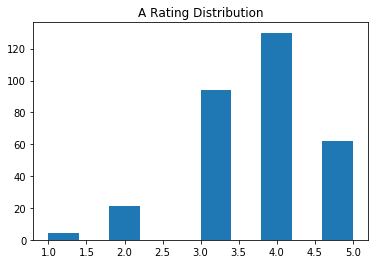


 B 
 count    271.000000
mean       3.896679
std        0.832460
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: stars, dtype: float64 

Mean "useful" rating:  2.7011070110701105
Mean "funny" rating:  1.3726937269372694
Mean "cool" rating:  1.081180811808118


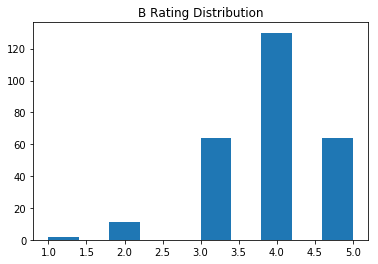


 C 
 count    239.000000
mean       3.949791
std        0.823493
min        2.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: stars, dtype: float64 

Mean "useful" rating:  2.5439330543933054
Mean "funny" rating:  0.7322175732217573
Mean "cool" rating:  1.1506276150627615


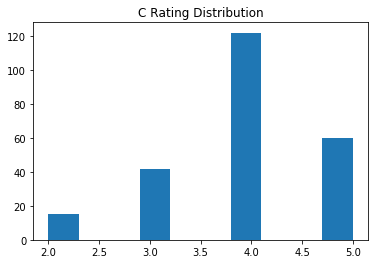


 D 
 count    234.000000
mean       3.649573
std        0.744839
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: stars, dtype: float64 

Mean "useful" rating:  2.8461538461538463
Mean "funny" rating:  1.0341880341880343
Mean "cool" rating:  0.9615384615384616


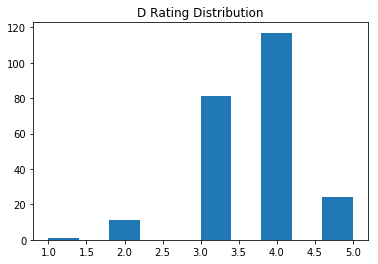


 E 
 count    227.000000
mean       3.528634
std        0.903689
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: stars, dtype: float64 

Mean "useful" rating:  1.577092511013216
Mean "funny" rating:  0.6079295154185022
Mean "cool" rating:  1.1233480176211454


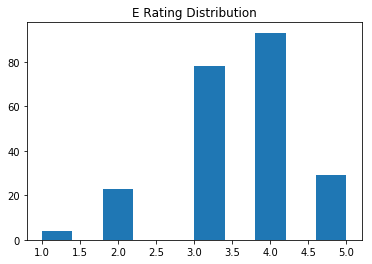


 F 
 count    224.000000
mean       3.080357
std        0.827101
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: stars, dtype: float64 

Mean "useful" rating:  2.3348214285714284
Mean "funny" rating:  1.3526785714285714
Mean "cool" rating:  0.5758928571428571


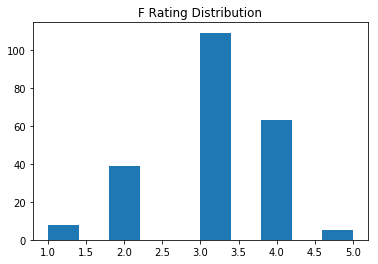


 G 
 count    214.000000
mean       3.457944
std        1.090121
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: stars, dtype: float64 

Mean "useful" rating:  5.462616822429907
Mean "funny" rating:  2.1401869158878504
Mean "cool" rating:  2.677570093457944


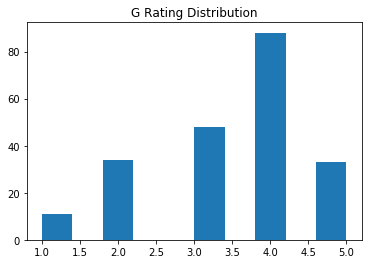


 H 
 count    198.000000
mean       3.848485
std        0.717633
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: stars, dtype: float64 

Mean "useful" rating:  2.378787878787879
Mean "funny" rating:  0.9494949494949495
Mean "cool" rating:  0.8484848484848485


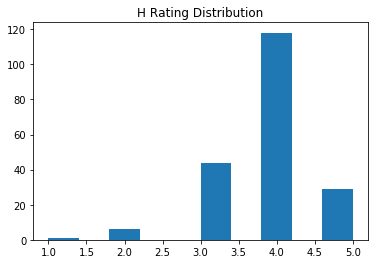


 J 
 count    197.000000
mean       3.746193
std        0.993113
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: stars, dtype: float64 

Mean "useful" rating:  0.8578680203045685
Mean "funny" rating:  0.15736040609137056
Mean "cool" rating:  0.17766497461928935


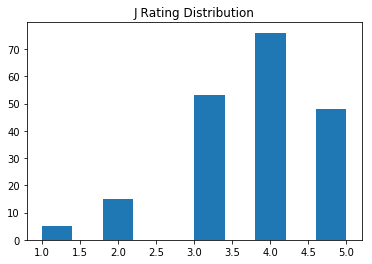


 I 
 count    197.000000
mean       3.045685
std        1.532952
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: stars, dtype: float64 

Mean "useful" rating:  3.3857868020304567
Mean "funny" rating:  1.3401015228426396
Mean "cool" rating:  1.1370558375634519


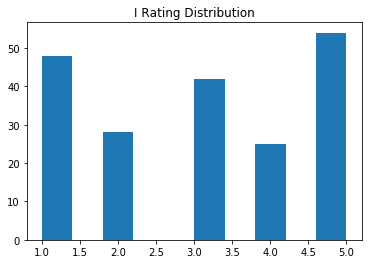

In [21]:
for user in userlist:
    print('\n', user, '\n', df1[df1['user_id'] == user]['stars'].describe(), '\n')
    print('Mean "useful" rating: ', df1[df1['user_id'] == user]['useful'].mean())
    print('Mean "funny" rating: ', df1[df1['user_id'] == user]['funny'].mean())
    print('Mean "cool" rating: ', df1[df1['user_id'] == user]['cool'].mean())
    plt.hist(df1[df1['user_id'] == user]['stars'], bins=10)
    plt.title('{} Rating Distribution'.format(user))
    plt.show()

## Text Cleaning

In [22]:
def text_cleaner(text):
    
    # Remove '--' if there are any instances of it so SpaCy can process the text
    text = re.sub(r'--',' ',text)
    
    # Get rid of headings in square brackets.
    text = re.sub("[\[].*?[\]]", "", text)
    
    # Get rid of chapter titles.
    text = re.sub(r'Chapter \d+','',text)
    
    # Get rid of extra whitespace.
    text = ' '.join(text.split())
    
    return text

In [23]:
df1['cleaned_text'] = df1['text'].apply(lambda x: text_cleaner(x))

In [24]:
df1['cleaned_text']

127600    If you watch the food network long enough, you...
127601    Jan's Meat & Deli is a pleasant Polish market ...
127602    If you find yourself in downtown Calgary with ...
127603    Rice-a-Roni may call themselves the "San Franc...
127604    This cute little bakery in Glenmore Landing ha...
127605    If you want to make room in your closet while ...
127606    Whaddya say about a pub where you order a pint...
127607    From its chic decor to its delicious, adventur...
127608    If you're looking for Christian themed books, ...
127609    Finally, a little truth in advertising. Pete's...
127610    Grass Roots hemp store is a happy little slice...
127611    The Nut Man is a fantastic locally owned confe...
127612    If you're parched and you're in the Pacific Pl...
127613    If you've got a green thumb, or a garden gnome...
127614    Friends who live in the neighbourhood suggeste...
127615    Livingstone and Cavell is a bustling toy store...
127616    Plato Restaurant, Lounge and B

### SpaCy preprocessing

In [25]:
nlp = spacy.load('en')

#### Block Text for Each User

In [26]:
user_A_block = ' '.join(df1[df1['user_id'] == 'A']['text'])
user_B_block = ' '.join(df1[df1['user_id'] == 'B']['text'])
user_C_block = ' '.join(df1[df1['user_id'] == 'C']['text'])
user_D_block = ' '.join(df1[df1['user_id'] == 'D']['text'])
user_E_block = ' '.join(df1[df1['user_id'] == 'E']['text'])
user_F_block = ' '.join(df1[df1['user_id'] == 'F']['text'])
user_G_block = ' '.join(df1[df1['user_id'] == 'G']['text'])
user_H_block = ' '.join(df1[df1['user_id'] == 'H']['text'])
user_I_block = ' '.join(df1[df1['user_id'] == 'I']['text'])
user_J_block = ' '.join(df1[df1['user_id'] == 'J']['text'])

In [27]:
user_A_nlp = nlp(user_A_block)
user_B_nlp = nlp(user_B_block)
user_C_nlp = nlp(user_C_block)
user_D_nlp = nlp(user_D_block)
user_E_nlp = nlp(user_E_block)
user_F_nlp = nlp(user_F_block)
user_G_nlp = nlp(user_G_block)
user_H_nlp = nlp(user_H_block)
user_I_nlp = nlp(user_I_block)
user_J_nlp = nlp(user_J_block)

In [28]:
# Let's save some time rewriting each of these individually:

codechunk = "user_{}_sents = pd.DataFrame([[sent, '{}'] for sent in user_{}_nlp.sents])"

for user in userlist:
    print(codechunk.format(user, user, user))

user_A_sents = pd.DataFrame([[sent, 'A'] for sent in user_A_nlp.sents])
user_B_sents = pd.DataFrame([[sent, 'B'] for sent in user_B_nlp.sents])
user_C_sents = pd.DataFrame([[sent, 'C'] for sent in user_C_nlp.sents])
user_D_sents = pd.DataFrame([[sent, 'D'] for sent in user_D_nlp.sents])
user_E_sents = pd.DataFrame([[sent, 'E'] for sent in user_E_nlp.sents])
user_F_sents = pd.DataFrame([[sent, 'F'] for sent in user_F_nlp.sents])
user_G_sents = pd.DataFrame([[sent, 'G'] for sent in user_G_nlp.sents])
user_H_sents = pd.DataFrame([[sent, 'H'] for sent in user_H_nlp.sents])
user_J_sents = pd.DataFrame([[sent, 'J'] for sent in user_J_nlp.sents])
user_I_sents = pd.DataFrame([[sent, 'I'] for sent in user_I_nlp.sents])


In [29]:
user_A_sents = pd.DataFrame([[sent, 'A'] for sent in user_A_nlp.sents])
user_B_sents = pd.DataFrame([[sent, 'B'] for sent in user_B_nlp.sents])
user_C_sents = pd.DataFrame([[sent, 'C'] for sent in user_C_nlp.sents])
user_D_sents = pd.DataFrame([[sent, 'D'] for sent in user_D_nlp.sents])
user_E_sents = pd.DataFrame([[sent, 'E'] for sent in user_E_nlp.sents])
user_F_sents = pd.DataFrame([[sent, 'F'] for sent in user_F_nlp.sents])
user_G_sents = pd.DataFrame([[sent, 'G'] for sent in user_G_nlp.sents])
user_H_sents = pd.DataFrame([[sent, 'H'] for sent in user_H_nlp.sents])
user_J_sents = pd.DataFrame([[sent, 'J'] for sent in user_J_nlp.sents])
user_I_sents = pd.DataFrame([[sent, 'I'] for sent in user_I_nlp.sents])

In [30]:
user_A_sents.head()

,0,1
0,"(I, have, no, complaints, about, this, clinic, .)",A
1,"(The, RPharm, was, knowledgeable, ,, and, we, ...",A
2,"(Both, times, we, 've, been, ,, they, had, sto...",A
3,"(They, also, sell, accessories, like, bed, net...",A
4,"(Only, inconvenience, is, that, they, do, n't,...",A


In [31]:
user_B_sents.head()

,0,1
0,"(Play, De, Record, is, a, big, old, record, st...",B
1,"(They, have, all, the, new, stuff, in, several...",B
2,"(They, also, ssell, music, electronics, and, D...",B
3,"(They, also, carry, some, clothing, by, local,...",B
4,"(The, owner, ,, Nav, Sangha, is, a, hot, local...",B


In [32]:
sentences_list = [user_A_sents, user_B_sents, user_C_sents, user_D_sents, user_E_sents, user_F_sents, user_G_sents, user_H_sents, user_J_sents, user_I_sents]


sentences_list[0]

,0,1
0,"(I, have, no, complaints, about, this, clinic, .)",A
1,"(The, RPharm, was, knowledgeable, ,, and, we, ...",A
2,"(Both, times, we, 've, been, ,, they, had, sto...",A
3,"(They, also, sell, accessories, like, bed, net...",A
4,"(Only, inconvenience, is, that, they, do, n't,...",A
5,"(Not, as, great, as, Pho, Dau, Bo, 's, sate, b...",A
6,"(They, also, have, thick, rice, noodle, soups,...",A
7,"(Most, everything, under, $, 10, so, ca, n't, ...",A
8,"(The, spring, rolls, were, particularly, tight...",A
9,"(Minimal, strip, -, mall, worthy, decor, .)",A


In [33]:
for user_sents in sentences_list:
    print(len(user_sents))

2488
2115
2417
1362
1225
2127
4388
1672
1105
4216


In [34]:
df1['nlp_text'] = df1['cleaned_text'].apply(lambda x: (nlp(x)))

In [35]:
df1['nlp_text']

127600    (If, you, watch, the, food, network, long, eno...
127601    (Jan, 's, Meat, &, Deli, is, a, pleasant, Poli...
127602    (If, you, find, yourself, in, downtown, Calgar...
127603    (Rice, -, a, -, Roni, may, call, themselves, t...
127604    (This, cute, little, bakery, in, Glenmore, Lan...
127605    (If, you, want, to, make, room, in, your, clos...
127606    (Whaddya, say, about, a, pub, where, you, orde...
127607    (From, its, chic, decor, to, its, delicious, ,...
127608    (If, you, 're, looking, for, Christian, themed...
127609    (Finally, ,, a, little, truth, in, advertising...
127610    (Grass, Roots, hemp, store, is, a, happy, litt...
127611    (The, Nut, Man, is, a, fantastic, locally, own...
127612    (If, you, 're, parched, and, you, 're, in, the...
127613    (If, you, 've, got, a, green, thumb, ,, or, a,...
127614    (Friends, who, live, in, the, neighbourhood, s...
127615    (Livingstone, and, Cavell, is, a, bustling, to...
127616    (Plato, Restaurant, ,, Lounge,

In [36]:
# Utility function to create a list of the 2000 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(2000)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 10 == 0:
            print("Processing row {}".format(i))
            
    return df

In [37]:
codechunk2 = 'user_{}_words = bag_of_words(user_{}_nlp)'

for user in userlist:
    print(codechunk2.format(user, user))

user_A_words = bag_of_words(user_A_nlp)
user_B_words = bag_of_words(user_B_nlp)
user_C_words = bag_of_words(user_C_nlp)
user_D_words = bag_of_words(user_D_nlp)
user_E_words = bag_of_words(user_E_nlp)
user_F_words = bag_of_words(user_F_nlp)
user_G_words = bag_of_words(user_G_nlp)
user_H_words = bag_of_words(user_H_nlp)
user_J_words = bag_of_words(user_J_nlp)
user_I_words = bag_of_words(user_I_nlp)


In [39]:
# Set up the bags.

user_A_words = bag_of_words(user_A_nlp)
user_B_words = bag_of_words(user_B_nlp)
user_C_words = bag_of_words(user_C_nlp)
user_D_words = bag_of_words(user_D_nlp)
user_E_words = bag_of_words(user_E_nlp)
user_F_words = bag_of_words(user_F_nlp)
user_G_words = bag_of_words(user_G_nlp)
user_H_words = bag_of_words(user_H_nlp)
user_J_words = bag_of_words(user_J_nlp)
user_I_words = bag_of_words(user_I_nlp)

In [40]:
user_A_words

['-PRON-',
 ' ',
 'the',
 'good',
 'be',
 'not',
 '\n\n',
 'like',
 'food',
 'menu',
 'place',
 'a',
 '$',
 "'s",
 'sauce',
 'star',
 'price',
 'this',
 'have',
 'meat',
 'great',
 'nice',
 'service',
 'restaurant',
 'chicken',
 'get',
 'dish',
 'go',
 'come',
 'fry',
 'order',
 'time',
 'table',
 'bit',
 'will',
 'serve',
 'small',
 'selection',
 'if',
 'pretty',
 'cheese',
 'flavour',
 'tasty',
 'drink',
 'try',
 'would',
 'large',
 '\n',
 'item',
 'spot',
 'quality',
 'include',
 'pizza',
 'hot',
 '4',
 'fresh',
 'lot',
 'store',
 'rice',
 'special',
 'available',
 'bar',
 'people',
 'thing',
 'way',
 'find',
 'day',
 'town',
 'need',
 'staff',
 'soup',
 'eat',
 'patio',
 'plate',
 'pork',
 'option',
 'crispy',
 'style',
 'topping',
 'calgary',
 'look',
 'main',
 'sweet',
 'burger',
 'texture',
 'beef',
 'egg',
 '5',
 'make',
 'ask',
 'hard',
 'work',
 'sure',
 'there',
 'spice',
 'e.g.',
 'base',
 'etc',
 'decor',
 'high',
 'classic',
 'lunch',
 'traditional',
 'cook',
 'free',
 't

In [41]:
# Combine bags to create a set of unique words.

common_words = set(user_A_words + user_B_words + user_C_words + user_D_words + user_E_words + user_F_words + user_G_words + user_H_words + user_J_words + user_I_words)

len(common_words)

6974

In [42]:
user_A_df = pd.DataFrame()
user_B_df = pd.DataFrame()
user_C_df = pd.DataFrame()
user_D_df = pd.DataFrame()
user_E_df = pd.DataFrame()
user_F_df = pd.DataFrame()
user_G_df = pd.DataFrame()
user_H_df = pd.DataFrame()
user_J_df = pd.DataFrame()
user_I_df = pd.DataFrame()

In [43]:
df_list = [user_A_df, user_B_df, user_C_df, user_D_df, user_E_df,
 user_F_df, user_G_df, user_H_df, user_J_df, user_I_df]

## Feature Generation

In [44]:
user_sent_df_list = zip(userlist, sentences_list, df_list)

In [45]:
def bow_to_csv(user, user_sents, user_df):
    try:
        user_df = pd.read_csv('user_{}_df.csv'.format(user), index_col=0)
        print('{}_df.csv exists'.format(user))
    except FileNotFoundError:
        bow_df = bow_features(user_sents, common_words)
        bow_df.to_csv('user_{}_df.csv'.format(user))
        print('{} saved as .csv'.format(user))

In [48]:
if __name__ == '__main__':
    for user, user_sents, user_df in user_sent_df_list:
        p = mp.Process(target=bow_to_csv, args=(user, user_sents, user_df))
        p.start()

Processing row 0
Processing row 0
Processing row 0
Processing row 0
Processing row 0
Processing row 0
Processing row 0
Processing row 0
Processing row 10
Processing row 0
Processing row 20
Processing row 10
Processing row 10
Processing row 10
Processing row 30
Processing row 40
Processing row 10
Processing row 20
Processing row 50
Processing row 20
Processing row 10
Processing row 60
Processing row 30
Processing row 20
Processing row 10
Processing row 70
Processing row 30
Processing row 20
Processing row 80
Processing row 20
Processing row 40
Processing row 90
Processing row 30
Processing row 40
Processing row 30
Processing row 50
Processing row 100
Processing row 10
Processing row 10
Processing row 30
Processing row 110
Processing row 50
Processing row 60
Processing row 120
Processing row 40
Processing row 20
Processing row 130
Processing row 70
Processing row 60
Processing row 140
Processing row 40
Processing row 40
Processing row 50
Processing row 150
Processing row 160
Processing r

Process Process-12:
Traceback (most recent call last):
  File "<ipython-input-45-91e12ed475ef>", line 3, in bow_to_csv
    user_df = pd.read_csv('user_{}_df.csv'.format(user), index_col=0)
  File "/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 678, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 440, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 787, in __init__
    self._make_engine(self.engine)
  File "/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 1014, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 1708, in __init__
    self._reader = parsers.TextReader(src, **kwds)
  File "pandas/_libs/parsers.pyx", line 384, in pandas._libs.parsers.TextReader.__cinit__
  File "pandas/

  File "/anaconda3/lib/python3.6/site-packages/pandas/core/internals.py", line 732, in _try_cast_result
    return maybe_downcast_to_dtype(result, dtype)
  File "/anaconda3/lib/python3.6/site-packages/pandas/core/dtypes/cast.py", line 87, in maybe_downcast_to_dtype
    inferred_type = lib.infer_dtype(_ensure_object(result.ravel()))
KeyboardInterrupt
Process Process-16:
Traceback (most recent call last):
  File "<ipython-input-45-91e12ed475ef>", line 3, in bow_to_csv
    user_df = pd.read_csv('user_{}_df.csv'.format(user), index_col=0)
  File "/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 678, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 440, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 787, in __init__
    self._make_engine(self.engine)
  File "/anaconda3/lib/python3.6/site-packages/panda

  File "/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 787, in __init__
    self._make_engine(self.engine)
  File "<ipython-input-36-936347affdc9>", line 39, in bow_features
    df.loc[i, word] += 1
  File "/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 1014, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py", line 1708, in __init__
    self._reader = parsers.TextReader(src, **kwds)
  File "/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py", line 189, in __setitem__
    self._setitem_with_indexer(indexer, value)
  File "/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py", line 651, in _setitem_with_indexer
    value=value)
  File "pandas/_libs/parsers.pyx", line 384, in pandas._libs.parsers.TextReader.__cinit__
  File "pandas/_libs/parsers.pyx", line 695, in pandas._libs.parsers.TextReader._setup_parser_source
  File "/anaconda3/li

  File "<ipython-input-36-936347affdc9>", line 39, in bow_features
    df.loc[i, word] += 1
  File "/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py", line 189, in __setitem__
    self._setitem_with_indexer(indexer, value)
  File "/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py", line 651, in _setitem_with_indexer
    value=value)
  File "/anaconda3/lib/python3.6/site-packages/pandas/core/internals.py", line 3693, in setitem
    return self.apply('setitem', **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/pandas/core/internals.py", line 3581, in apply
    applied = getattr(b, f)(**kwargs)
  File "/anaconda3/lib/python3.6/site-packages/pandas/core/internals.py", line 943, in setitem
    values = self._try_coerce_and_cast_result(values, dtype)
  File "/anaconda3/lib/python3.6/site-packages/pandas/core/internals.py", line 752, in _try_coerce_and_cast_result
    result = self._try_cast_result(result, dtype=dtype)
  File "/anaconda3/lib/python3.6/site-pa

In [54]:
user_A_df = pd.read_csv('user_A_df.csv', index_col=0)

In [55]:
user_B_df = pd.read_csv('user_B_df.csv', index_col=0)

In [56]:
user_C_df = pd.read_csv('user_C_df.csv', index_col=0)

In [57]:
user_D_df = pd.read_csv('user_D_df.csv', index_col=0)

In [58]:
user_E_df = pd.read_csv('user_E_df.csv', index_col=0)

In [59]:
user_F_df = pd.read_csv('user_F_df.csv', index_col=0)

In [60]:
user_G_df = pd.read_csv('user_G_df.csv', index_col=0)

In [61]:
user_H_df = pd.read_csv('user_H_df.csv', index_col=0)

In [62]:
user_I_df = pd.read_csv('user_I_df.csv', index_col=0)

In [63]:
user_J_df = pd.read_csv('user_J_df.csv', index_col=0)

In [64]:
df_list = [user_A_df, user_B_df, user_C_df, user_D_df, user_E_df,
 user_F_df, user_G_df, user_H_df, user_J_df, user_I_df]

In [67]:
for frame in df_list:
    print(len(frame))
for frame in df_list:    
    print(len(frame.columns))

2488
2115
2417
1362
1225
2127
4388
1672
4216
1105
6614
6614
6976
6614
6614
6614
6614
6614
6614
6614


In [90]:
for user, frame in zip(userlist, df_list):
    if user != 'C':
        for subframe in df_list:
            if user !='C':
                print(user, set(frame.columns) == set(subframe.columns))
        print('\n')

71XS True
71XS True
71XS False
71XS True
71XS True
71XS True
71XS True
71XS True
71XS True
71XS True


HikP True
HikP True
HikP False
HikP True
HikP True
HikP True
HikP True
HikP True
HikP True
HikP True


zT9W True
zT9W True
zT9W False
zT9W True
zT9W True
zT9W True
zT9W True
zT9W True
zT9W True
zT9W True


1HFk True
1HFk True
1HFk False
1HFk True
1HFk True
1HFk True
1HFk True
1HFk True
1HFk True
1HFk True


j5xt True
j5xt True
j5xt False
j5xt True
j5xt True
j5xt True
j5xt True
j5xt True
j5xt True
j5xt True


ELfz True
ELfz True
ELfz False
ELfz True
ELfz True
ELfz True
ELfz True
ELfz True
ELfz True
ELfz True


U3Su True
U3Su True
U3Su False
U3Su True
U3Su True
U3Su True
U3Su True
U3Su True
U3Su True
U3Su True


9BuT True
9BuT True
9BuT False
9BuT True
9BuT True
9BuT True
9BuT True
9BuT True
9BuT True
9BuT True


vLix True
vLix True
vLix False
vLix True
vLix True
vLix True
vLix True
vLix True
vLix True
vLix True




In [83]:
set(user_A_df.columns) == set(user_B_df.columns)

True

In [82]:
len(set(user_A_df.columns + user_C_df.columns))

ValueError: operands could not be broadcast together with shapes (6614,) (6976,) 

In [85]:
set(user_A_df.columns) == set(user_C_df.columns)

False

In [52]:
features = pd.concat(df_list)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.
